In [1]:
import numpy as np

In [8]:
tab = np.array([
    [3, 5],
    [6, 2],
    [1, 1],
    [5, 9]
])

In [9]:
tab_sort = tab[np.argsort(tab[:,0])]
tab_sort

array([[1, 1],
       [3, 5],
       [5, 9],
       [6, 2]])

In [23]:
a = format(8,'b').zfill(8)
b = format(32, 'b').zfill(8)[::-1]

print(a)
print(b)

00001000
00000100


In [8]:
pt_crossover = 4

for i in range(pt_crossover):
    print("i", i)
    tmp_a = a[i]
    
    a = a[:i] + b[i] + a[i+1:]
    b = b[:i] + tmp_a + b[i+1:]
    
print('a', a.zfill(10))
print('b', b)

i 0
i 1
i 2
i 3
a 0001100100
b 100000


In [5]:
tab_crossover = (a,b)

In [ ]:
tab = np.array([2])
tab = np.array(tab, tab_crossover)

In [10]:
for i in range(8,4, -1):
    print(i)

8
7
6
5


In [6]:
abs(0-1)

1

In [17]:
tab = np.random.rand(10,3)
tab_sort = tab[np.argsort(tab[:,0])]
tab_sort

array([[3.77829625e-01, 8.86186817e-01, 3.40420631e-01],
       [4.52916022e-01, 1.05342005e-01, 3.26996965e-01],
       [5.77303335e-01, 3.55369684e-01, 8.57094192e-01],
       [7.43092755e-01, 2.50182201e-01, 9.04903636e-01],
       [8.24011160e-01, 7.54181859e-01, 9.72429937e-01],
       [9.25242796e-01, 5.80159811e-01, 7.13904446e-02],
       [9.45836576e-01, 4.42282144e-04, 6.89958382e-01],
       [9.56781898e-01, 9.65950635e-02, 7.63858971e-01],
       [9.72664328e-01, 7.98803598e-01, 4.25225346e-01],
       [9.96151133e-01, 9.44755087e-01, 2.16480595e-01]])

In [ ]:
from bvhpython.bvh import Bvh

import pandas as pd
import os
import numpy as np

%run bvh_extract.ipynb

path = "data/own_data/"
list_dir = os.listdir(path)

ext_bvh = extract_bvh(9000,354)

def remove_no_bvh_file(file_list, path):
    for f in file_list:
        path_f = path + f
        fileName, fileExtension = os.path.splitext(path_f)
        if fileExtension != '.bvh':
            file_list.remove(f)
        
    return file_list

tab_mvts = np.zeros((6,2, 9000, 354))
i=0
j=0
for d in list_dir:
    list_file = remove_no_bvh_file(os.listdir(path+d), 
                                   path+d)
    print("Dossier", d)  
    print('i',i)
    j=0
    for f in list_file:
        #print("File", f)
        with open(path+d+"/"+f) as m:
            #mvt = np.array(Bvh(m.read()).frames, dtype="float").T
            #df = pd.DataFrame(mvt)
            #bvh_file = Bvh(m.read())
            bvh_file = ext_bvh.extract_one(m)
            tab_mvts[j,i] = np.array(bvh_file.frames)
            #df_tmp = pd.DataFrame({d: bvh_file})
            #df.to_csv(f+".csv")
        j+=1

    i+=1 
            
df = pd.DataFrame(tab_mvts, index = ['1', '2', '3', '4', '5', '6'], columns = ['M', 'MP'])

In [65]:
from bvhpython.bvh import Bvh

import pandas as pd
import os
import numpy as np

class bvh_to_csv:
    
    def _bvh_files(self,path):
        # lors du parcours d'un dossier
        # on recupere que les fichiers avec l'extension .bvh
        # pour pouvoir parcourir ensuite tous les fichiers à extraire
        file_list = os.listdir(path)
        for f in os.listdir(path):
            path_f = path + f
            fileName, fileExtension = os.path.splitext(path_f)
            if fileExtension != '.bvh':
                file_list.remove(f)

        return file_list
    
    def extract_file(self,path,file,path_to_save):
        if os.path.exists(path_csv_data) == False:
            os.mkdir(path_csv_data)
    
        # extraction d'un fichier bvh
        with open(path + '/'+ file) as m:
            bvh_file = Bvh(m.read()).frames
            #mvt = np.array(bvh_file, dtype="float").T
            df = pd.DataFrame(bvh_file)
            df.to_csv(path_to_save+'/'+file+".csv")
            
    def extract_folder(self,path_folder,path_to_save):
        if os.path.exists(path_csv_data) == False:
            os.mkdir(path_csv_data)
        # extraction des fichiers bvh dans un dossier
        list_bvh_file = self._bvh_files(path_folder)
        for f in list_bvh_file:
            self.extract_file(path_folder,f,path_to_save)
            

In [66]:
btc = bvh_to_csv()
path = 'data/train/bvh'
save = 'data/train/csv'
btc.extract_folder(path, save)

In [15]:
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

vals

array([-1.09617371, -1.73980559, -0.57550217,  0.06698163, -0.16715114,
       -0.26203113,  1.07844463,  1.36265261, -0.32040676, -0.23118379])

In [36]:
import numpy as np
rand_num = np.random.normal(0.0001,0.00001, 10)
print("Random number between 0 and 1:")
print(rand_num)

Random number between 0 and 1:
[8.93090661e-05 1.00042147e-04 1.10980627e-04 1.01907765e-04
 1.11738178e-04 1.01857770e-04 9.02796602e-05 9.82811244e-05
 9.50420753e-05 1.10247577e-04]


In [35]:
t = np.array(['a', 'b', 'c', 'd', 'e' , 'f', 'i', 'j', 'k', 'l', 'm'])
print(t[rand_num])

['f' 'k' 'e' 'l' 'b' 'k' 'f' 'k' 'a' 'c']


In [78]:
res = np.array([['303', '0.0001', '15', '10', 'selu', 'nan', '0.5'],
 ['224', '0.0001', '41', '27', 'relu', 'nan', '0.5'],
 ['375', '1e-06', '31', '17', 'relu', 'nan', '0.5'],
 ['240', '1e-06', '43', '6', 'relu', 'nan', '0.5'],
 ['327', '1e-05', '35', '5', 'tanh', '0.6022366583347321', '0.75'],
 ['80', '0.0001', '40', '20', 'selu', 'nan', '0.5'],
 ['352', '1e-06', '29', '10', 'relu', 'nan', '0.5'],
 ['246', '0.0001', '16', '18', 'tanh', '0.5272396951913834', '0.75'],
 ['156', '0.0001', '2', '24', 'relu', 'nan', '0.5'],
 ['346', '1e-06', '19', '14', 'relu', 'nan', '0.5'],
 ['0', '0', '0', '0', '0', '0', '0']])

In [79]:
res = res[np.argsort(res[:, 6])]
res

array([['0', '0', '0', '0', '0', '0', '0'],
       ['303', '0.0001', '15', '10', 'selu', 'nan', '0.5'],
       ['224', '0.0001', '41', '27', 'relu', 'nan', '0.5'],
       ['375', '1e-06', '31', '17', 'relu', 'nan', '0.5'],
       ['240', '1e-06', '43', '6', 'relu', 'nan', '0.5'],
       ['80', '0.0001', '40', '20', 'selu', 'nan', '0.5'],
       ['352', '1e-06', '29', '10', 'relu', 'nan', '0.5'],
       ['156', '0.0001', '2', '24', 'relu', 'nan', '0.5'],
       ['346', '1e-06', '19', '14', 'relu', 'nan', '0.5'],
       ['327', '1e-05', '35', '5', 'tanh', '0.6022366583347321', '0.75'],
       ['246', '0.0001', '16', '18', 'tanh', '0.5272396951913834',
        '0.75']], dtype='<U18')

In [82]:
res_flip = np.flip(res, 0)
res_flip.shape

(11, 7)

In [87]:
top_3 = np.zeros((7))

top_3 = np.vstack([res_flip, top_3])
top_3


array([['246', '0.0001', '16', '18', 'tanh', '0.5272396951913834',
        '0.75'],
       ['327', '1e-05', '35', '5', 'tanh', '0.6022366583347321', '0.75'],
       ['346', '1e-06', '19', '14', 'relu', 'nan', '0.5'],
       ['156', '0.0001', '2', '24', 'relu', 'nan', '0.5'],
       ['352', '1e-06', '29', '10', 'relu', 'nan', '0.5'],
       ['80', '0.0001', '40', '20', 'selu', 'nan', '0.5'],
       ['240', '1e-06', '43', '6', 'relu', 'nan', '0.5'],
       ['375', '1e-06', '31', '17', 'relu', 'nan', '0.5'],
       ['224', '0.0001', '41', '27', 'relu', 'nan', '0.5'],
       ['303', '0.0001', '15', '10', 'selu', 'nan', '0.5'],
       ['0', '0', '0', '0', '0', '0', '0'],
       ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0']], dtype='<U32')

In [13]:
import numpy as np 
from bvhpython.bvh import Bvh
import matplotlib.pyplot as plt

path = "data/own_data/marche/marcheChar00.bvh"
with open(path) as f:
    mvt = np.array(Bvh(f.read()).frames, dtype="float").T
    
path = "data/own_data/marche parkinsonienne/marche_pChar00.bvh"
with open(path) as f:
    mvt2 = np.array(Bvh(f.read()).frames, dtype="float").T

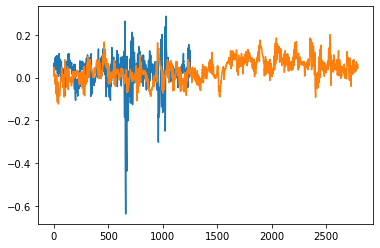

In [15]:
plt.plot(mvt[97,:])
plt.plot(mvt2[97,:])

In [59]:
from random import randint

tab_tem = np.array(range(21)) + 1
sequences = np.array([3,6,12,4,16],dtype='int')

for n in range(100):
    seq = np.array([],dtype='int')
    tab = tab_tem
    for i in range(5):
        nb_mvt = tab.size - 1
        rand_int = int(tab[randint(0,nb_mvt)])
        to_del = np.where(tab==rand_int)
        tab = np.delete(tab,to_del)
        seq = np.append(seq,rand_int)
    sequences = np.vstack([sequences, seq])

In [60]:
import pandas as pd

(val,counts) = np.unique(sequences,axis=0,return_counts=True)
if counts[counts!=1].size == 0:
    print("ok")
    df = pd.DataFrame(sequences)
    df.to_csv('../Protocole Experimental/sequence.csv')

ok
